# Introduction to Seaborn

Seaborn is a high-level statistical visualization library built on Matplotlib. It provides beautiful and easy-to-use plotting functions that work directly with Pandas DataFrames.

Compared to Matplotlib, Seaborn makes it **easier** to:
- Work with **DataFrames** (without extracting columns manually).
- Generate **complex statistical plots** with a single function call.
- Apply **aesthetic improvements** automatically.

In this notebook, we will explore how Seaborn simplifies visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Matplotlib vs. Seaborn

Before diving into Seaborn, let's compare it with Matplotlib. We will:

1. Create a **line plot** using Matplotlib.
2. Create the same plot using Seaborn.
3. Observe how the syntax and styling differ.


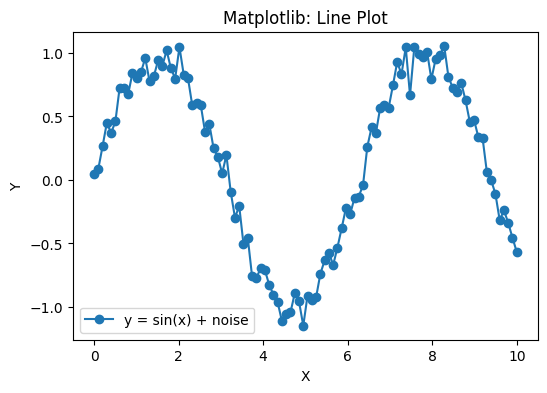

In [2]:
# Create a sample dataset
np.random.seed(42)
df = pd.DataFrame({
    "x": np.linspace(0, 10, 100),
    "y": np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.1, 100)
})

# Using Matplotlib
fig, ax = plt.subplots(figsize=(6, 4)) # Alternative to fig.set_figwidth / fig.set_figheight
ax.plot(df["x"], df["y"], marker="o", linestyle="-", label="y = sin(x) + noise")
ax.set_title("Matplotlib: Line Plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()
plt.show()

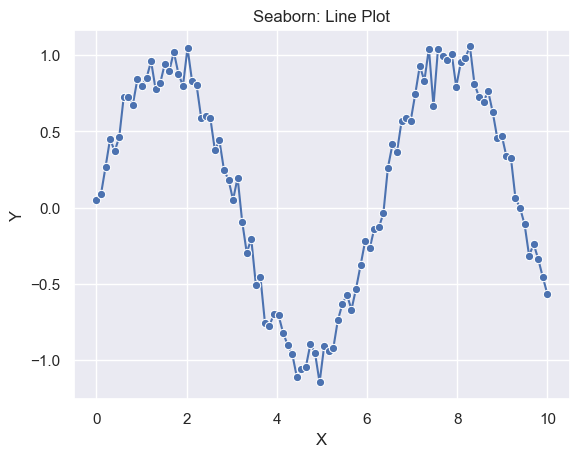

In [3]:
# Set the theme of Seaborn to the default one for all future plots unless specified differently
sns.set_theme()

# Using Seaborn
sns.lineplot(data=df, x="x", y="y", marker="o").set(
    title="Seaborn: Line Plot",
    xlabel="X",
    ylabel="Y"
)
plt.show()

### Observations:
- **Matplotlib** requires explicitly defining the axes (`ax.plot()`) and setting labels manually.
- **Seaborn** works **directly with DataFrames**, making the syntax more concise.
- Seaborn automatically applies a cleaner style.

# 2. Working with Categorical Data

Seaborn is particularly useful when working with **categorical variables**.

We will now:
1. Visualize relationships between categories.
2. Explore how data can be grouped and compared.

### Basic Scatter Plot
Seaborn includes some example datasets that we can use to explore the different plots and options. Let's have a look at the [Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/) dataset:

<div style="text-align: center;">
    <img alt="Artwork by @allison_horst" src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="600px" /><br>
    <i style="color: #A9A9A9;">Artwork by @allison_horst</i>
</div>

In [4]:
# Load example dataset
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Let's look at the co-ocurrences of certain bill lengths and bill depths. To do so, we can use a scatter plot:

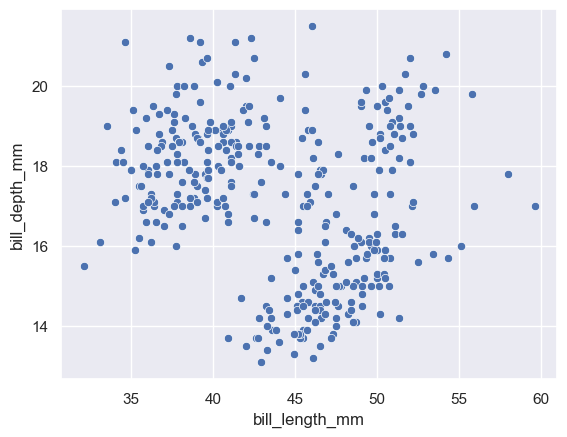

In [5]:
# Use one of the built-in themes
sns.set_style("darkgrid")  # Other options: "whitegrid", "dark", "white", "ticks"

# Seaborn scatter plot
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm")
plt.show()

#### **What do you notice?**
- Are there any clusters?
- Can we explain why some points are grouped together?

### Adding Color for Categories
Let's color the data points based on penguin species.

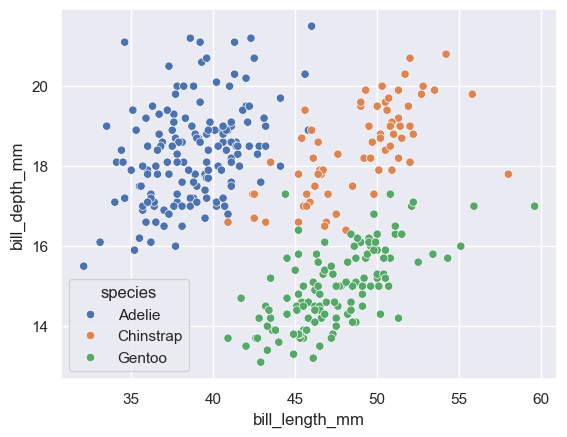

In [6]:
# Use one of the built-in themes
sns.set_style("darkgrid")  # Other options: "whitegrid", "dark", "white", "ticks"

# Seaborn scatter plot
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species")  # Tell Seaborn to color points according to species
plt.show()

We now see that these three clusters that we observed are indeed explained by the species of the penguins. Next, let's have a look at other plot types.

### Adding marignal axes with additional information
Seaborn also allows us to plot the univariate distributions of the variables (in this case `bill_depth_mm` and `bill_length_mm`) besides the main plot showing the joint distribution.This can be done using the `jointplot`:

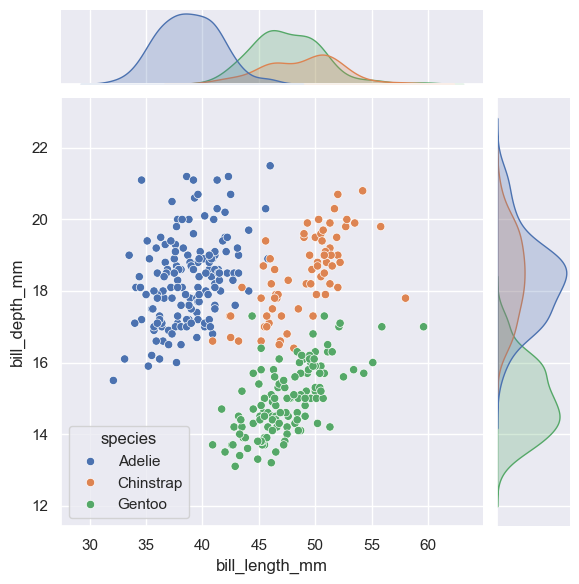

In [7]:
sns.jointplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species")  # Tell Seaborn to color points according to species
plt.show()

# 3. Understanding Distributions with Seaborn

Next, we explore **distribution plots**, which are useful for:
- Understanding the spread of values.
- Comparing different groups.

### Basic Histogram
Let's visualize the distribution of **flipper lengths**.

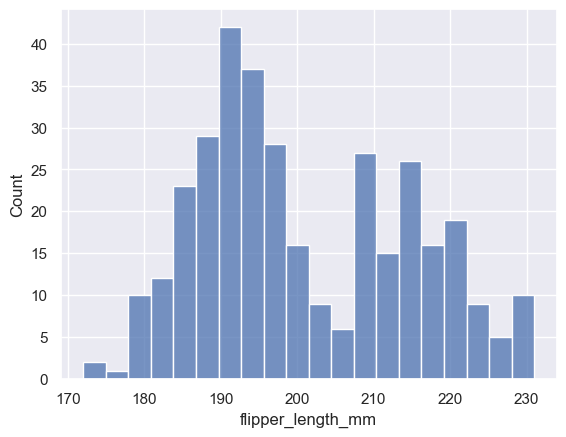

In [8]:
# Histogram
sns.histplot(data=df, x="flipper_length_mm", bins=20)
plt.show()

### Adding Density Estimation
We can add a **Kernel Density Estimate (KDE)** to show the shape of the distribution.

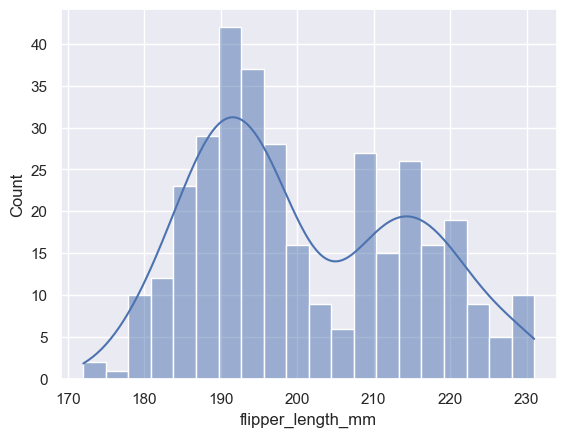

In [9]:
# Histogram with KDE
sns.histplot(data=df, x="flipper_length_mm", kde=True, bins=20)
plt.show()

We can see that the KDE curve smooths the histogram to show the data distribution more clearly.

# 4. Heatmaps: Visualizing Relationships Between Variables

Seaborn makes it easy to visualize correlations using **heatmaps**.

### Visualizing the correlation matrix

Seaborn makes it easy to visualize correlations using heatmaps. We have used such a heatmap before in Matplotlib, but now we will see how easy it is to use in Seaborn. First, let's compute the correlations between four of our variables:

In [10]:
# Compute correlation matrix
df_corr = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].corr()
df_corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


To make this matrix easier to interpret, we will plot it as a heatmap:

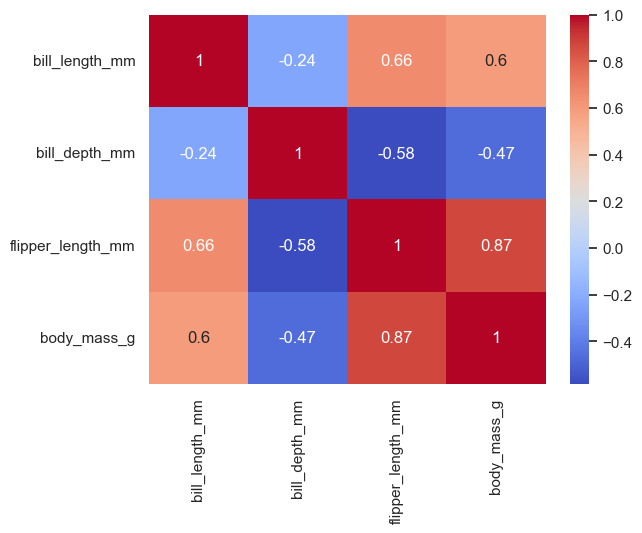

In [11]:
# Heatmap
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.show()

### **Observations**
- The heatmap shows how variables are related.
- Values closer to **1 or -1** indicate stronger correlations.
- In this color palette, high values are indicated by red colors and low values by blue colors, as indicated by the color bar on the right

# Exercises

Now it's time to apply what you've learned! Try the following exercises to explore different Seaborn features.

---

## **Exercise 1: Faceted Scatter Plots**
**Goal:** Create **multiple scatter plots** side by side for different islands.

### Steps:
- Use the **penguins dataset** 
- Create a scatter plot of **bill_length_mm vs. bill_depth_mm**.
- Instead of coloring by species, **create separate plots for each island** using the `col` argument in `sns.relplot()`.

### Hint:
Check out [`sns.relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html) in the documentation.

---

## **Exercise 2: Violin Plots**
**Goal:** Compare distributions using **violin plots**, which combine boxplots and KDE.

### Steps:
- Use the **penguins dataset**.
- Create a **violin plot** of **flipper_length_mm** grouped by **species** (x-axis).
- Add `hue` to compare male and female penguins.

### Bonus:
Use `split=True` to see how violin plots **separate the distributions** by sex.

### Hint:
Check out [`sns.violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html) in the documentation.

---

## **Exercise 3: Customizing Heatmaps**
**Goal:** Customize a heatmap to make it **more readable**.

### Steps:
- Compute the **correlation matrix** of the penguins dataset.
- Create a heatmap using `sns.heatmap()`.
- Customize it:
  - Set **a different colormap**.
  - Rotate x/y labels (`sns.heatmap()` returns a Matplotlib axes object that you can use)
  - Change the **annotation format** so values are displayed with **two decimal places** (use the `fmt` argument and look up how to specify the format).

### Hint:
Explore different colormap options in [`sns.color_palette()`](https://seaborn.pydata.org/tutorial/color_palettes.html).

---

## **Exercise 4: Exploring Categorical Data in the "Tips" Dataset**
**Goal:** Use a **categorical plot** to analyze tipping behavior.

### Steps:
- Load the built-in **"tips" dataset** from Seaborn.
- Create a **boxplot** to compare **total bill amounts (y-axis) across different days of the week**.
- Add `hue` to see if tipping behavior differs by gender.

### Bonus:
- Instead of a boxplot, use a **swarmplot** (`sns.swarmplot()`) to show individual data points.
- Try **both plots together** by using `ax = sns.boxplot(...)` and then `sns.swarmplot(..., ax=ax, dodge=True)`. You might want to use a different `palette` for your second plot for the sake of visibility.

### Hint:
Check out [`sns.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) and [`sns.swarmplot()`](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) in the documentation.


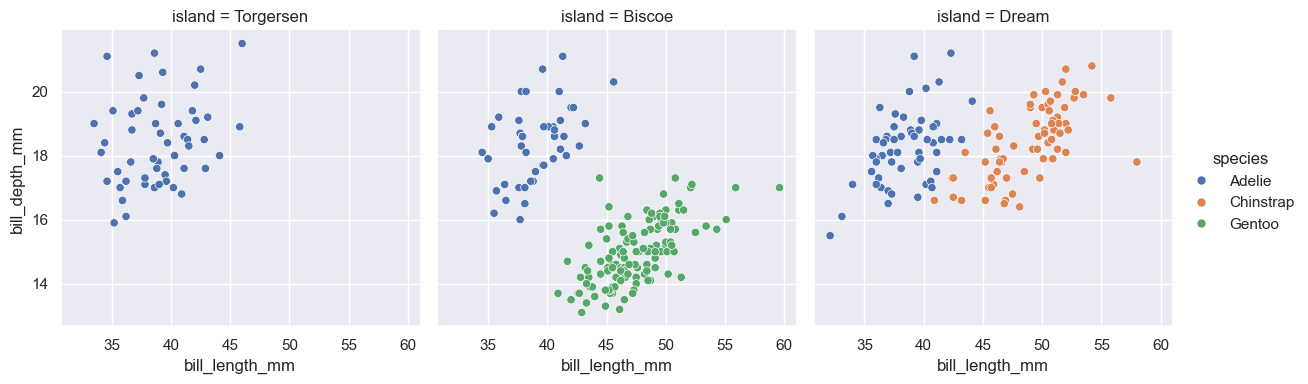

In [12]:
# Exercise 1
g = sns.relplot(
    data=df, x="bill_length_mm", y="bill_depth_mm", col="island", 
    kind="scatter", height=4, aspect=1, hue="species"
)

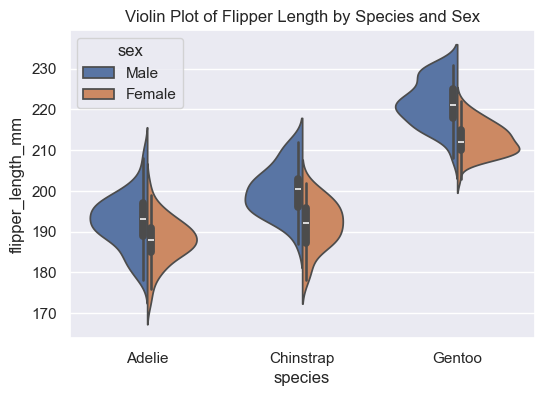

In [13]:
# Exercise 2
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x="species", y="flipper_length_mm", hue="sex", split=True)
plt.title("Violin Plot of Flipper Length by Species and Sex")
plt.show()

In [14]:
sns.color_palette("Blues")

[(0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
 (0.16696655132641292, 0.48069204152249134, 0.7291503267973857),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)]

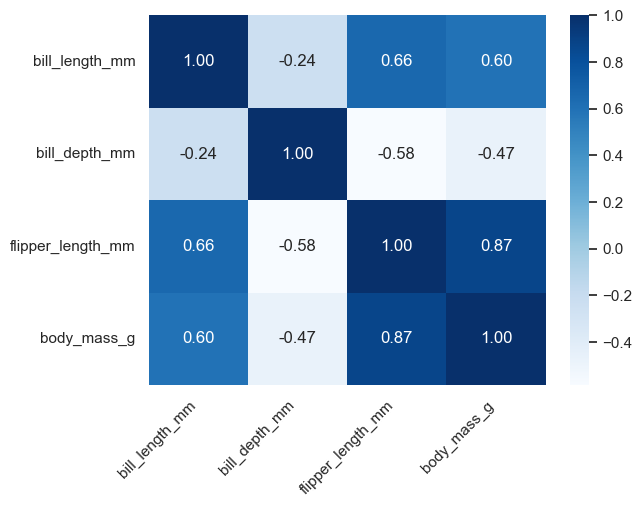

In [15]:
# Exercise 3
g = sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap="Blues", fmt=".2f")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right");

In [16]:
# Exercise 4
df_tips = sns.load_dataset("tips")
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


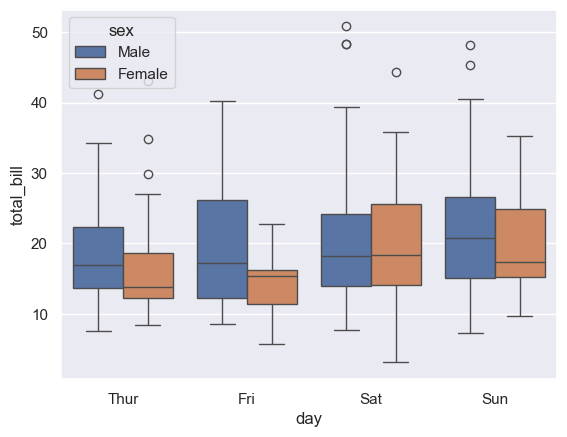

In [17]:
g = sns.boxplot(df_tips, x="day", y="total_bill", hue="sex");

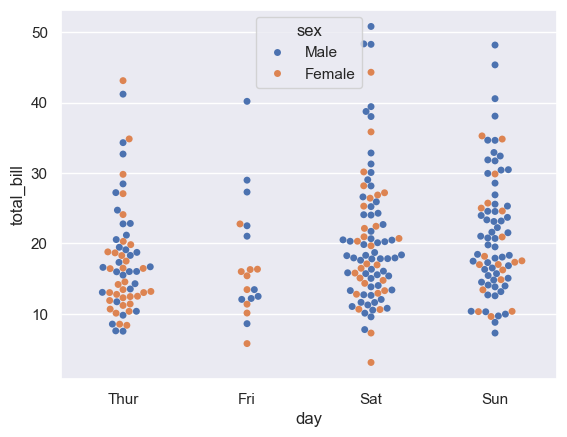

In [18]:
sns.swarmplot(df_tips, x="day", y="total_bill", hue="sex");

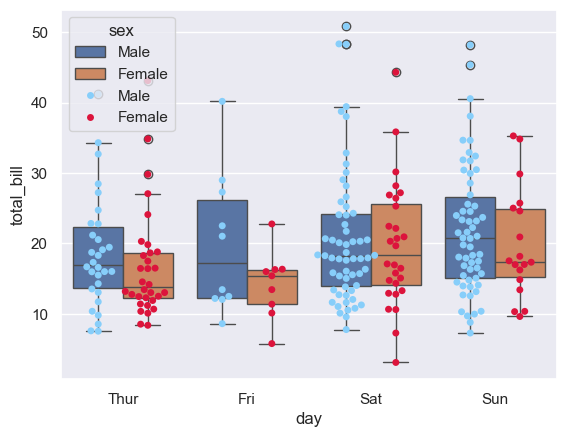

In [19]:
ax = sns.boxplot(df_tips, x="day", y="total_bill", hue="sex")
sns.swarmplot(df_tips, x="day", y="total_bill", hue="sex", palette=["lightskyblue", "crimson"], ax=ax, dodge=True);